# Visualizing dust storm

### About

This notebook visualized the Godzilla dust storm event which took place in June and July 2020. At this time,  strong winds took up dust in the Sahara region and transported it westwards across the Atlantic ocean until the American continent. 
This notebook makes use of the CAMS global reanalysis dataset (EAC4), downloaded from ADS (Atmospheric Data Store) and plots the dust optical depth at 550 nm as a tracer of the amount of dust in the atmosphere. This code generates a .gif animation for the timerange June 1 to July 30 2020 of the dust optical depth overlaid on the world map contours. 

This notebook includes the following steps:

* Import libraries
* Download the data
* Plotting the data

### Import libraries

In [1]:
# Data download and handling
import cdsapi # pipeline to download data from ADS
import numpy as np
import xarray as xr

# Data visualisation
%matplotlib inline
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cm # nice color maps
import matplotlib.animation as animation
plt.rcParams.update({'font.size':16, 'font.family':'serif'})

# Others
import warnings
warnings.filterwarnings('ignore')

### Download the data

In [2]:
ADS_URL = "https://ads.atmosphere.copernicus.eu/api/v2"

# enter your ADS authentication key:
ADS_KEY = "####"

In [3]:
import cdsapi

c = cdsapi.Client(url=ADS_URL, key=ADS_KEY)

c.retrieve(
    'cams-global-reanalysis-eac4',
    {
        'format': 'netcdf',
        'variable': 'dust_aerosol_optical_depth_550nm',
        'date': '2020-06-01/2020-07-20',
        'time': '00:00',
    },
    'dust_eac4_072020.nc')

2021-12-17 18:09:57,031 INFO Welcome to the CDS
2021-12-17 18:09:57,033 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-reanalysis-eac4
2021-12-17 18:09:57,106 INFO Request is completed
2021-12-17 18:09:57,108 INFO Downloading https://download-0001.copernicus-atmosphere.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1639758917.539652-9501-11-18adb81f-7f05-48ff-8739-f58cc202fd2f.nc to dust_eac4_072020.nc (11M)
2021-12-17 18:09:58,913 INFO Download rate 6.1M/s                               


Result(content_length=11572172,content_type=application/x-netcdf,location=https://download-0001.copernicus-atmosphere.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1639758917.539652-9501-11-18adb81f-7f05-48ff-8739-f58cc202fd2f.nc)

### Plot the data

In [4]:
fn = f'./dust_eac4_072020.nc'
data = xr.open_dataset(fn)['duaod550']

2021-12-17 19:37:28,806 WARNING MovieWriter ffmpeg unavailable; using Pillow instead.
2021-12-17 19:37:28,807 INFO Animation.save using <class 'matplotlib.animation.PillowWriter'>


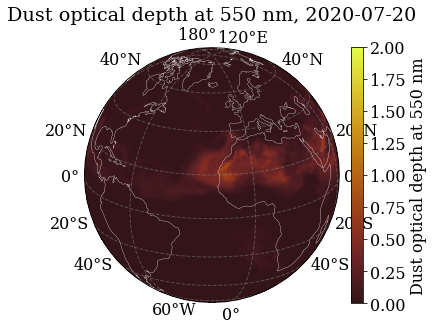

In [6]:
# reading the number of time steps
n = data.time.shape[0]

# generating the figure
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=20, 
                                                     central_longitude=-20))

# plotting the data
im  = ax.pcolormesh(data.longitude, data.latitude, data[0], cmap=cm.solar, 
                    vmin=0, vmax=2.0, transform=ccrs.PlateCarree())
title = ax.set_title('')

# adjusting the plotting setup
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, 
             linestyle='--') 
ax.coastlines(color='white', linewidth=0.3) 
cbar = plt.colorbar(im, fraction=0.046, pad=0.04) 
cbar.set_label('Dust optical depth at 550 nm') 

# Generating the animation
def animate(i):
    im.set_array(np.array(data[i]).flatten()) # updating the data
    title.set_text('Dust optical depth at 550 nm, '+\
                    str(data.time[i].values)[0:10]) # updating the title
    return im, title
    
# saving the animation
anim = animation.FuncAnimation(fig, animate, frames=len(data.time), 
                               interval=300)
anim.save('dust_optical_depth_godzilla_eac4.gif', dpi=200)
plt.show()